# Введение в Matplotlib.

## Введение.

### 1. Подключение библиотек.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Рассмотрим эту ячейку чуть подробнее. 

В первой строке мы подключили модуль matplotlib.pyplot. На наших занятиях мы не будем использовать Matplotlib "в чистом виде", мы будем использовать ее модуль Pyplot, который предоставляет более простой и дружелюбный интерфейс, а также MATLAB-подобный интерфейс.

В четвертой строке мы воспользовались магической командой интерактивной оболочки IPython `%matplotlib inline`. С помощью этой команды мы явно указали, как именно должны быть отрисованы графики. inline означает, что наши графики будут неинтерактивной картинкой, которую при необходимости можно скопировать и быстро вставить в нужный вам файл. Помимо inline можно выполнить специальную команду `%matplotlib notebook`, тогда отображаемые графики будут интерактивными, или выполнить команду `%matplotlib qt`, для того, чтобы график отобразился в отдельном виджите.

Магическую команду типа `%matplotlib ...` стоит вызывать один раз в самом начале ноутбука.

### 2. Указание стиля отрисовки.

Поскольку Matplotlib задумывался как утилита для построения графиков в стиле MATLAB, неудивительно, что стиль по умолчанию очень сильно похож на стиль отрисовки графиков в MATLAB. Однако далеко не всем нравится подобный визуальный стиль. С помощью следующей команды можно изменить стиль отрисовки:

In [2]:
plt.style.use('ggplot')

Я поставил отрисовку в стиле пакета ggplot, более подробную информацию о доступных стилях можно найти [здесь](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

### 3. Два интерфейса.

Matplotlib поддерживает два вида интерфейса: интерфейса в стиле MATLAB и объектно-ориентированный интерфейс.

**MATLAB-подобный интерфейс:**

Помимо того, что данный тип интерфейса удобен людям, знакомым с MATLAB, он также может быть очень удобен в случае, если вам необходимо на скорую руку построить графики, не вдаваясь в детали реализации и тратя большое количество времени на кастомизацию.

Проиллюстируем использование данного типа интерфейса примером:

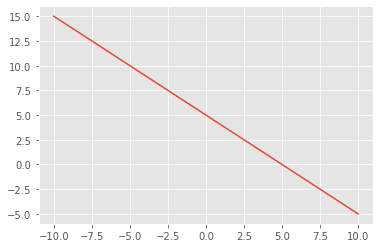

In [3]:
x = np.linspace(-10, 10, 100)
y = -x + 5

plt.plot(x, y)

Да, это настолько просто. Если убрать префиксы np и plt, то данный код будет не отличим от соответствующего кода в MATLAB.

**Объектно-ориентированный интерфейс:**

Однако интерфейса MATLAB'а является далеко не идеальным. При написании достаточно сложного кода для визуализации вы будете неприятно удивлены его объемом. Также MATLAB-подобный интерфейс с его отслеживанием активных рисунков зачастую бывает источником головной боли.

Во многом из-за этого существует объектно-ориентированный интерфейс, согласующийся с дзеном-python гораздо лучше.

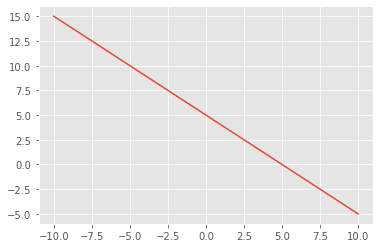

In [4]:
fig = plt.figure()
ax = plt.axes()
fig.add_axes(ax)

x = np.linspace(-10, 10, 100)
y = -x + 5

ax.plot(x, y)

Обратите внимание, что с точки зрения получаемых результатов, никаких отличий нет.

### 4. Figure и Axes. 

Как вы видите, для построения простого графика в рамках объектно-ориентированныго подхода, нам потребовалось больше строк кода, которые напоминают интерфейс MATLAB гораздо меньше первого примера. Давайте разберемся, что именно мы сделали:

+ `plt.figure()` - данный метод возвращает объект типа Figure, или, проще говоря, рисунок. Рисунок - это пространство, с которым связываются остальные объекты графики. Можно мыслить о Figure, как о холсте, на котором будут отрисованы графики, изображения, диаграммы рассеяния и т.д. и т.п. Таким образом с помощью первой строки мы создаем место для отрисовки. plt.figure() имеет ряд полезных аргументов. Одним из наиболее часто используемых параметров является `figsize` - кортеж, задающий размер рисунка в дюймах:  
```Python
fig = plt.figure(figsize=(8, 8))
```
Остальные аргументы позволяют задать цвет холста(`facecolor`), уникальный числовой идентификатор(`num`), число точек на дюйм(`dpi`) и прочие [настройки](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html);  

+ `plt.axes()` - данный метод возвращает объект типа Axes, т.е. координатные оси - пространство для отрисовки графиков. Из параметров, которые могут быть вам интересны - флаг `polar`, предназначенный для создания полярных осей координат:
```Python
ax = plt.axes(polar=True)
```
+ `fig.add_axes(ax)` - связываем наши оси с нашим риунком. При желании с помощью этого метода можно создавать новые координатные оси, связанные с рисунком;  
+ В строках 5-6 создаем данные для визуализации с помощью NumPy;  
+ `ax.plot(x, y)` - вызываем метод plot() класса Axes, которые создает экземпляр класса Line2D - двухмерная линия - по заданным массивам абсцисс и ординат. Созданная двухмерная линия связывается с данными координатными осями;  

## Практика визуализации.

Дальнейшее повествование построим вокруг визуализации простого амплитудно модулированного сигнала. Начнем совсем с простой задачи и постепенно будем усложнять её.

Итак, допустим у нас есть некоторый сигнал и мы бы хотели визуализировать его. Давайте этим и займемся. Для начала создадим наши данные для визуализации:

In [5]:
t = np.linspace(0, 4 * np.pi, 1000)
y_base = np.sin(20 * t)
y_modulation = 2 * np.sin(t) + 2.5
signal = y_base * y_modulation

### 1. Функция plot() или "А нарисуй мне этот график".

Визуализация функций одного аргумента возможна с помощью функции plot(). Выше мы видели примеры работы данной функции. Давайте познакомимся с ней поближе.

Так выглядит простейшая визуализация с использованием Matplotlib:

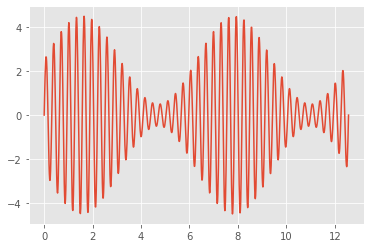

In [6]:
plt.plot(t, signal);

В данном примере нам требовался массив абсцисс и ординат. Возможно построение графика, используя только массив ординат:

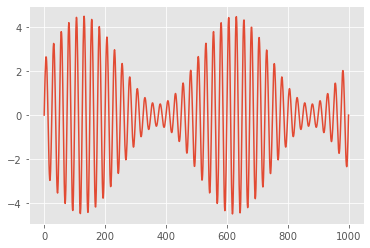

In [7]:
plt.plot(signal);

В данном случае в качестве абсцисс были взяты целые числа от `0` до `y.size - 1`.

### 2. Используем figsize или "Сделай картинку побольше".

Итак, у нас есть график нашего сигнала, по умолчанию размер картинки - $6.4 \times 4.8$. Однако этот размер не всегда оптимален. Допустим, мы хотим сделать график побольше. Давайте сделаем это двумя возможными способами:

**В стиле MATLAB:**

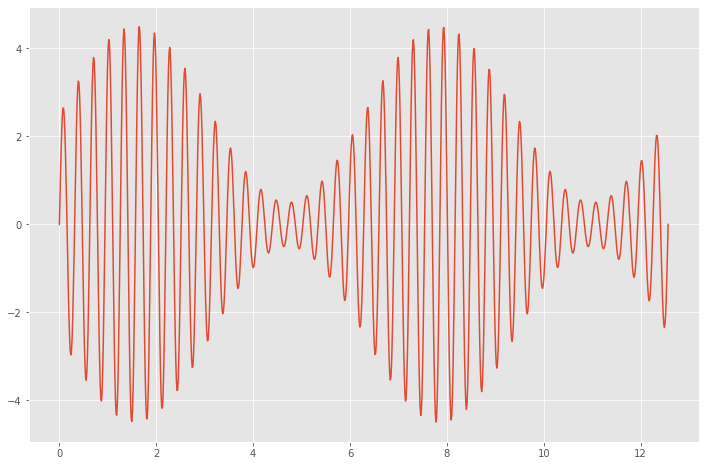

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(t, signal);

**В объектно-ориентированном стиле:**

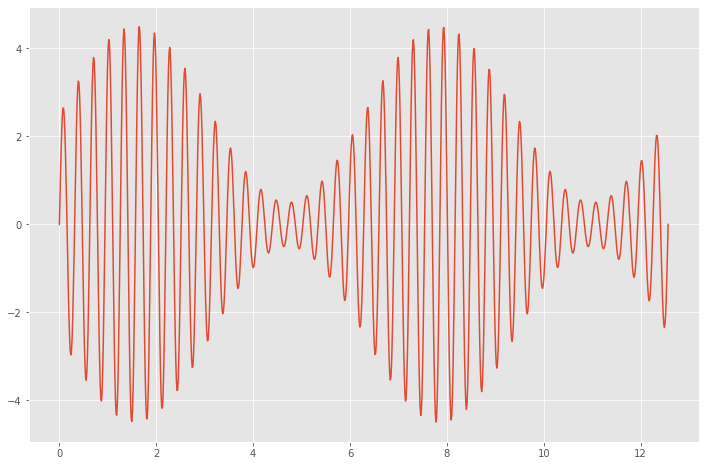

In [9]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes()
fig.add_axes(ax)

ax.plot(t, signal);

Мы можем значительно упросить код в этом примере с помощью функции plt.subplots(), которая будет разобрана подробно чуть позже.

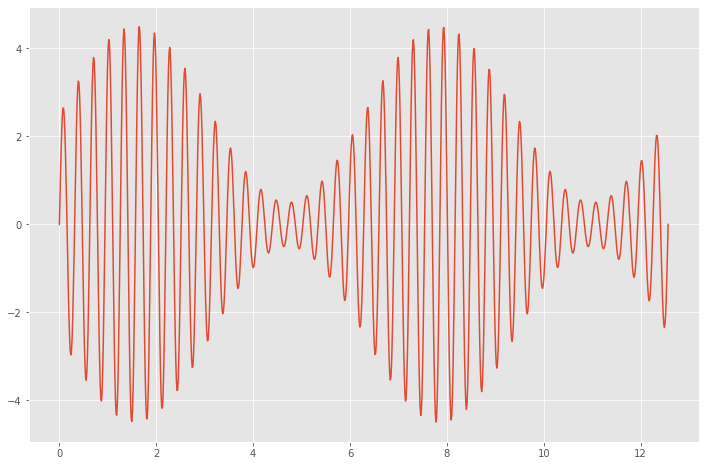

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(t, signal);

### 3. Кастомизируем график: цвет, размер, стиль.

Функция plot() предоставляет широкий спектр настроек вашего графика. Предположим мы хотим изменить цвет нашего графика и толщину линии.

Сделаем линию более толстой, а цвет более блеклым и холодным:

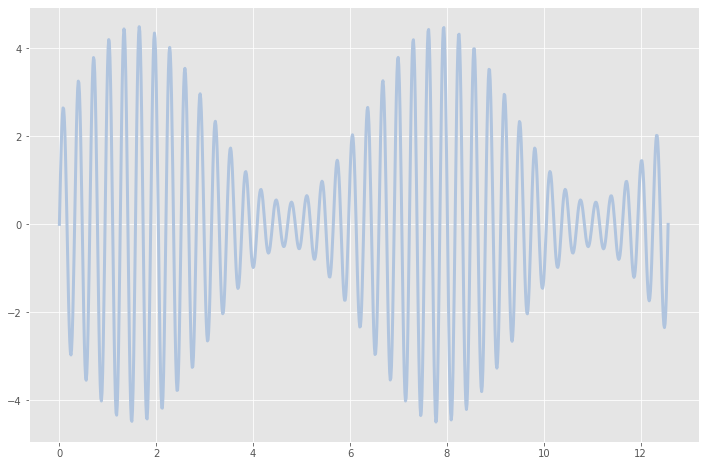

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(t, signal, color='lightsteelblue', linewidth=3);

**Промежуточные выводы:**

+ `color(c)` - параметр функции plot(), отвечающий за цвет линии. Цвет может быть задан строковым литералом из [таблицы доступных цветов](https://matplotlib.org/stable/gallery/color/named_colors.html), числом с плавающей точкой от 0 до 1 - оттенок серого, кортежем, состоящим из трех цветов - цвет в кодировке RGB, шестнадцетиричным числом формата RRGGBB - цвет в кодировке RGB; 
+ `linewidth` - толщина линии. Задается положительным числом. Чем больше число, тем толще линия.

Теперь наш график начинает сливаться с фоном. Давайте это исправим, подчеркнув форму сигнала. Для этого визуализируем огибающие более яркими цветами. Цветовым акцентом мы подчеркиваем, какая часть сигнала является информативной, а какая - нет. Также изобразим огибающую пунктиром, чтобы подчеркнуть, что данного сигнала в действительности нет.  

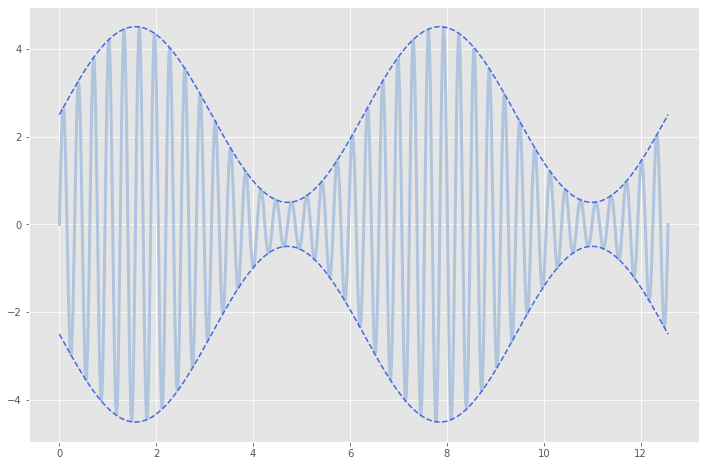

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(t, signal, color='lightsteelblue', linewidth=3)
ax.plot(t, y_modulation, color='royalblue', linestyle='--')
ax.plot(t, -y_modulation, color='royalblue', linestyle='--');

Промежуточные выводы:
+ `linestyle` - параметр plot() - тип линии. По умолчанию plot рисует сплошную линию. Указав тип линии:
```Python
linestyle='--' or linestyle='dashed'
```
мы получим пунктирную линию. Помимо этого существуют и [другие стили линий](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html);

+ С помощью неоднократного вызова функции plot() возможна отрисовка нескольких графиков в одних осях;

Помимо этих функций у plot() существует ряд полезных аргументов. К их числу относится `marker`, задающий формат отрисовки точек на графике, `label` - присваивающий имя данной линии.

### 4. Ограничиваем шкалы.

Как вы видите, на нашем графике существуют зазоры по оси абсцисс. Давайте избавимся от них.

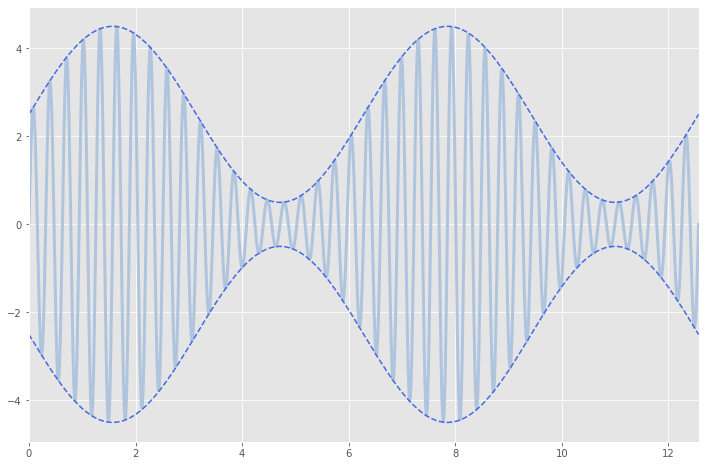

In [13]:
delta = (signal.max() - signal.min()) * 0.05  # Допустимый зазор по оси ординат

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(t, signal, color='lightsteelblue', linewidth=3)
ax.plot(t, y_modulation, color='royalblue', linestyle='--')
ax.plot(t, -y_modulation, color='royalblue', linestyle='--')

ax.set_xlim(t.min(), t.max())
ax.set_ylim(signal.min() - delta, signal.max() + delta);

Мы ограничили наши шкалы с помощью методов `set_xlim()` и `set_ylim()`. Обе эти функции в качестве аргументов принимают минимальное допустимое значение на данной оси и максимальное. Если подать эти значения в обратном порядке, то оси будут развернуты.

### 5. Изменение цены делений.

Matplotlib автоматически генерирует деления вдоль осей, исходя из переданных ему данных. Однако иногда полезным бывает установить цену делений и метки самостоятельно. Так в нашем примере было бы неплохо, если бы наша шкала по оси абсцисс была бы кратна $\pi$. 

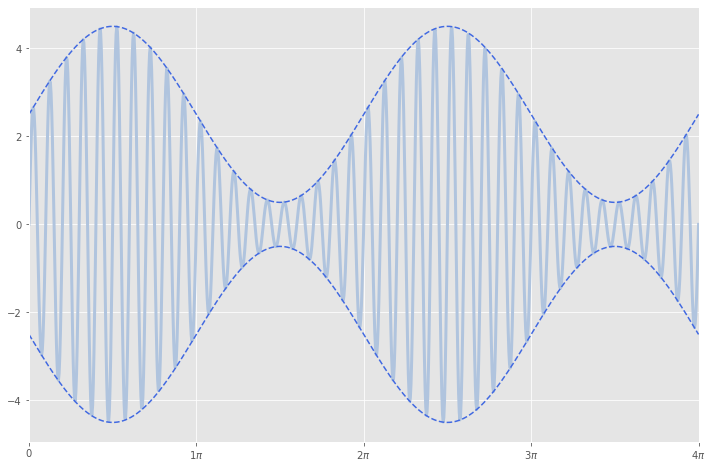

In [14]:
delta = (signal.max() - signal.min()) * 0.05
x_ticks = np.pi * np.arange(5)
label_maker = lambda x: f'{int(x / np.pi)}$\pi$' if x else str(0)
labels = [label_maker(tick) for tick in x_ticks]

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(t, signal, color='lightsteelblue', linewidth=3)
ax.plot(t, y_modulation, color='royalblue', linestyle='--')
ax.plot(t, -y_modulation, color='royalblue', linestyle='--')

ax.set_xlim(t.min(), t.max())
ax.set_xticks(x_ticks, labels=labels)

ax.set_ylim(signal.min() - delta, signal.max() + delta);

В данном примере мы использовали метод set_xticks(). В качестве аргументов мы передали новые значения делений и метки для каждого деления.

### 6. Подписи. 

Наш график постепенно преобретает репрезентативный вид. Однако нам бы хотелось увеличить информативность нашего графика. С этой целью давайте добавим подписи осей, а также наименование графика в целом.

In [15]:
delta = (signal.max() - signal.min()) * 0.05
x_ticks = np.pi * np.arange(5)
label_maker = lambda x: f'{int(x / np.pi)}$\pi$' if x else str(0)
labels = [label_maker(tick) for tick in x_ticks]

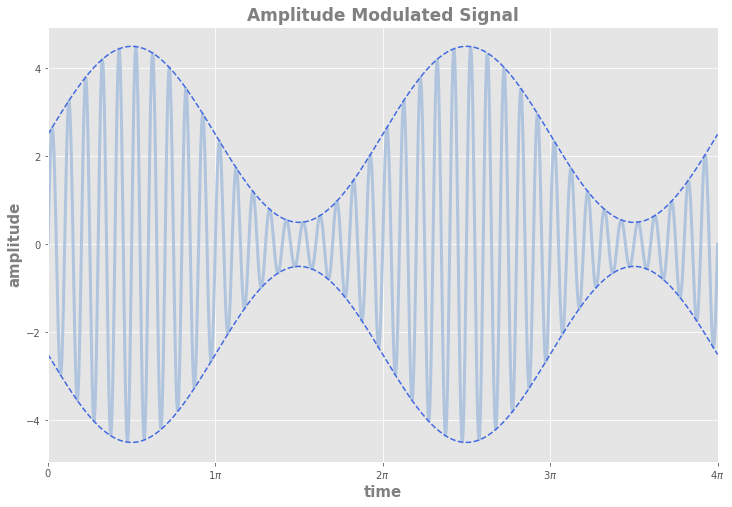

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title('Amplitude Modulated Signal', fontsize=17, fontweight='bold',
             c='gray')

ax.plot(t, signal, color='lightsteelblue', linewidth=3)
ax.plot(t, y_modulation, color='royalblue', linestyle='--')
ax.plot(t, -y_modulation, color='royalblue', linestyle='--')

ax.set_xlabel('time', fontsize=15, fontweight='bold', c='gray')
ax.set_ylabel('amplitude', fontsize=15, fontweight='bold', c='gray')

ax.set_xlim(t.min(), t.max())
ax.set_xticks(x_ticks, labels=labels)

ax.set_ylim(signal.min() - delta, signal.max() + delta);

В этом примере мы добавили наименование графика, а также подписи осей с помощтю следующих методов:

+ `set_title()` - добавляет название координатных осей. В качестве аргумента принимает строку. Также можно настроить дополнительные параметры - размер шрифта (`fontsize`), толщину шрифта (`fontweight`), цвет (`c`);  
+ `set_xlabel()`, `set_ylabel()` - аналоги метода set_title(); 

Также обратите внимание, что в этом примере мы разделили код на две ячейки. Теперь все необходимые вычисления осуществляются отдельно от визуализации. Подобное разделение считается хорошим тоном. Старайтесь и вы не смешивать визуализацию и вычисления.

### 7. Легенда.

Выше было отмечено, что функция plot() обладает параметром `lable`. Может показаться, что данный параметр бесполезен, но это не так. Данный параметр может быть использован в легенде. Давайте же добавим легенду на наш график, чтобы конкретизировать какая линия что обозначает.

In [17]:
delta = (signal.max() - signal.min()) * 0.05
x_ticks = np.pi * np.arange(5)
label_maker = lambda x: f'{int(x / np.pi)}$\pi$' if x else str(0)
labels = [label_maker(tick) for tick in x_ticks]

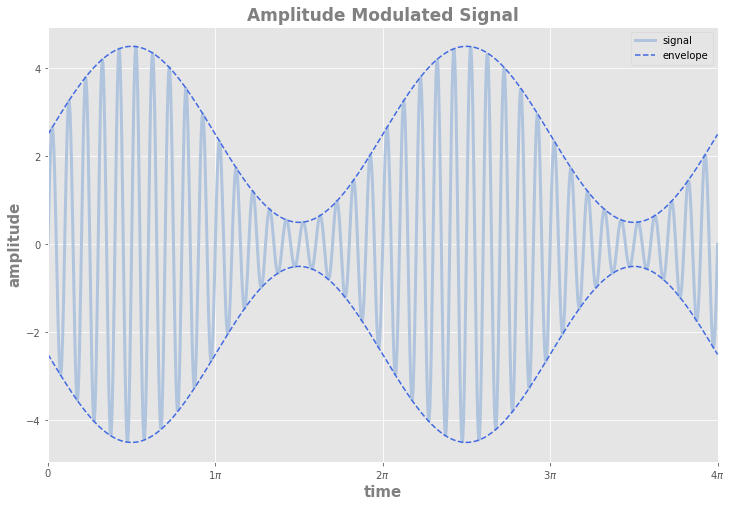

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title('Amplitude Modulated Signal', fontsize=17, fontweight='bold',
             c='gray')

ax.plot(t, signal, color='lightsteelblue', linewidth=3, label='signal')
ax.plot(t, y_modulation, color='royalblue', linestyle='--', label='envelope')
ax.plot(t, -y_modulation, color='royalblue', linestyle='--')

ax.set_xlabel('time', fontsize=15, fontweight='bold', c='gray')
ax.set_ylabel('amplitude', fontsize=15, fontweight='bold', c='gray')

ax.set_xlim(t.min(), t.max())
ax.set_xticks(x_ticks, labels=labels)

ax.set_ylim(signal.min() - delta, signal.max() + delta)

ax.legend();

Как мы видим, после вызова функции legend() в правом верхнем углу появилась легенда, увеличивающая понятность данных. По умолчанию Matplotlib сам определяет оптимальное место на графике для размещения легенды. Однако, при необходимости вы можете явно указать положение легенды, передав функции legend() соответствующий параметр `loc`.

### 8. Функция subplots() или "А нарисуй мне несколько графиков".

Предположим, что теперь мы хотим изобразить опорный сигнал, огибающую и модулированный сигнал на трех разных графиках так, чтобы все графики в итоге лежали на одном рисунке, чтобы потом использовать наш рисунок в дипломной работе. Тут-то на сцену и выходит наша функция subplots() позволяющая это сделать очень просто: 

In [19]:
t = np.linspace(0, 4 * np.pi, 1000)
y_base = np.sin(20 * t)
y_modulation = 2 * np.sin(t) + 2.5
signal = y_base * y_modulation

delta1 = (y_base.max() - y_base.min()) * 0.05
delta2 = (y_modulation.max() - y_modulation.min()) * 0.05
delta3 = (signal.max() - signal.min()) * 0.05

x_ticks = np.pi * np.arange(5)
label_maker = lambda x: f'{int(x / np.pi)}$\pi$' if x else str(0)
labels = [label_maker(tick) for tick in x_ticks]

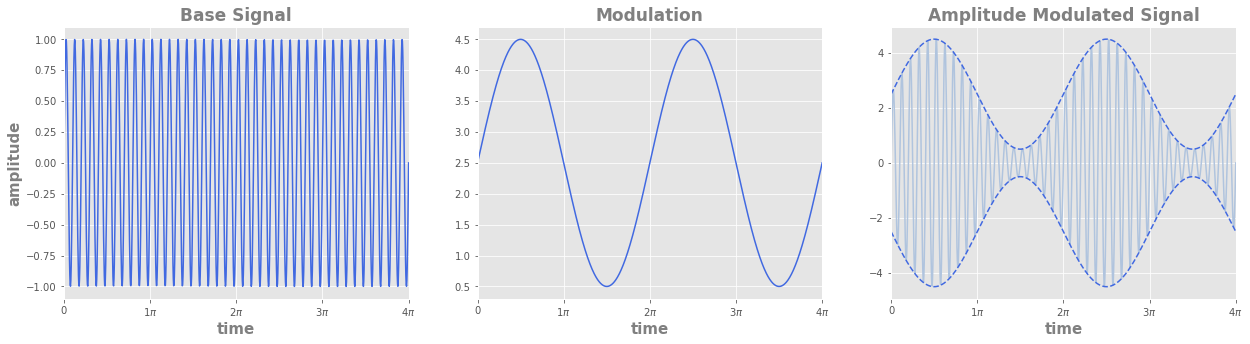

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

ax1.set_title('Base Signal', fontsize=17, fontweight='bold', c='gray')
ax2.set_title('Modulation', fontsize=17, fontweight='bold', c='gray')
ax3.set_title('Amplitude Modulated Signal', fontsize=17, fontweight='bold', c='gray')

ax1.plot(t, y_base, color='royalblue')
ax2.plot(t, y_modulation, color='royalblue')

ax3.plot(t, signal, color='lightsteelblue')
ax3.plot(t, y_modulation, color='royalblue', linestyle='--')
ax3.plot(t, -y_modulation, color='royalblue', linestyle='--')

ax1.set_ylabel('amplitude', fontsize=15, fontweight='bold', c='gray')

ax1.set_xlabel('time', fontsize=15, fontweight='bold', c='gray')
ax2.set_xlabel('time', fontsize=15, fontweight='bold', c='gray')
ax3.set_xlabel('time', fontsize=15, fontweight='bold', c='gray')

ax1.set_xlim(t.min(), t.max())
ax1.set_xticks(x_ticks, labels=labels)

ax2.set_xlim(t.min(), t.max())
ax2.set_xticks(x_ticks, labels=labels)

ax3.set_xlim(t.min(), t.max())
ax3.set_xticks(x_ticks, labels=labels)

ax1.set_ylim(y_base.min() - delta1, y_base.max() + delta1)
ax2.set_ylim(y_modulation.min() - delta2, 
             y_modulation.max() + delta2)
ax3.set_ylim(signal.min() - delta3, signal.max() + delta3);

Давайте подробнее разберёмся, что и как делает функция subplots(). 

Функция subplot принимает на вход два целых числа - $n$ - количество строк и $m$ - количество столбцов в сетке графиков, а также уже известный нам figsize. Помимо этих аргументов, конечно, есть и другие, но на данном этапе нам будет достаточно и этого. 

Возвращает функция Figure, и np.ndarray - массив размером $n \times m$, заполненный новыми экземплярами класса Axis. Если не указать явно число строк и столбцов, то функция subplots вернет Figure и экземпляр класса Axis (не массив!). 

В нашем примере мы явно указали, что хотим получить сетку графиков, состоящую из трех столбцов и одной строки, а также указали размеры рисунка. 

### 9. Сохраним результаты.

Итак, теперь, когда у нас есть наши графики, может возникнуть необходимость сохранить их в качестве картинки, чтобы использовать в публикациях и отправлять друзьям, не запуская заново весь предыдущий код. Для этого достаточно вызвать функцию plt.savefig() и передать ей в качестве аргумента название файла.

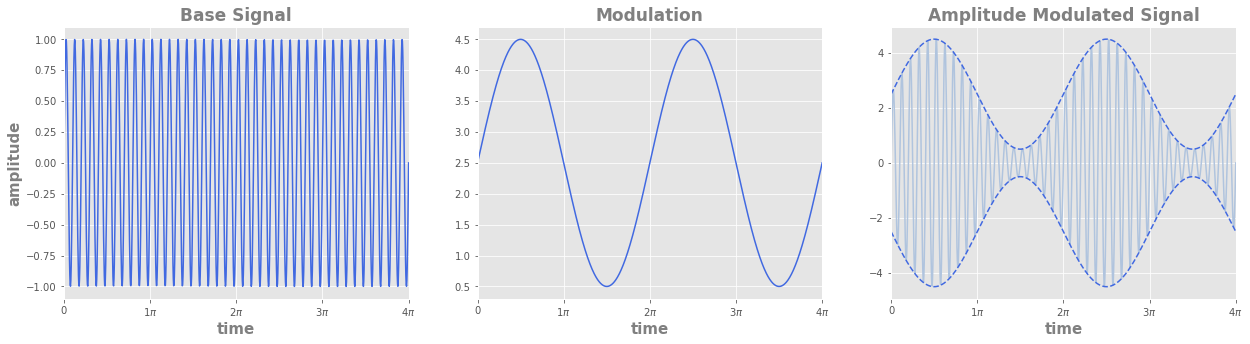

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))

ax1.set_title('Base Signal', fontsize=17, fontweight='bold', c='gray')
ax2.set_title('Modulation', fontsize=17, fontweight='bold', c='gray')
ax3.set_title('Amplitude Modulated Signal', fontsize=17, fontweight='bold', c='gray')

ax1.plot(t, y_base, color='royalblue')
ax2.plot(t, y_modulation, color='royalblue')

ax3.plot(t, signal, color='lightsteelblue')
ax3.plot(t, y_modulation, color='royalblue', linestyle='--')
ax3.plot(t, -y_modulation, color='royalblue', linestyle='--')

ax1.set_ylabel('amplitude', fontsize=15, fontweight='bold', c='gray')

ax1.set_xlabel('time', fontsize=15, fontweight='bold', c='gray')
ax2.set_xlabel('time', fontsize=15, fontweight='bold', c='gray')
ax3.set_xlabel('time', fontsize=15, fontweight='bold', c='gray')

ax1.set_xlim(t.min(), t.max())
ax1.set_xticks(x_ticks, labels=labels)

ax2.set_xlim(t.min(), t.max())
ax2.set_xticks(x_ticks, labels=labels)

ax3.set_xlim(t.min(), t.max())
ax3.set_xticks(x_ticks, labels=labels)

ax1.set_ylim(y_base.min() - delta1, y_base.max() + delta1)
ax2.set_ylim(y_modulation.min() - delta2, 
             y_modulation.max() + delta2)
ax3.set_ylim(signal.min() - delta3, signal.max() + delta3);

plt.savefig('signal.png');

### 10. Работа с картинками. 

Проверим, действительно ли мы сохранили нашу картинку, и сохранилась ли она корректно. 

Для этого загрузим нашу картинку в ноутбук и отобразим ее с помощью специальных функций matplotlib, предназначенных для этих целей. 

**Читаем изображение:**

In [30]:
image = plt.imread('./signal.png')
image

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       ...,

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1.

**Отображаем изобраение:**

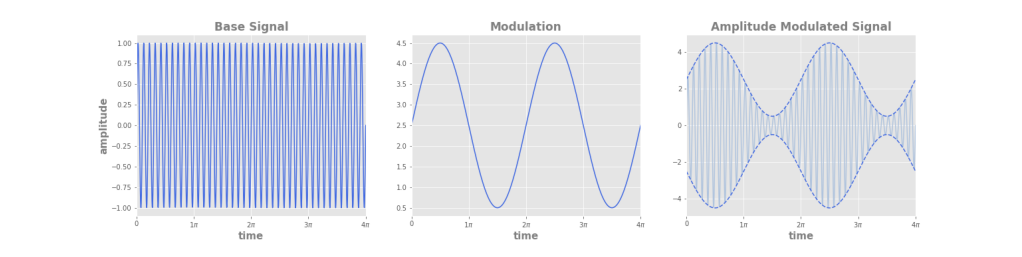

In [31]:
plt.figure(figsize=(18, 6))
plt.xticks([])
plt.yticks([])
plt.imshow(image);

### 11. Прочие функции отрисовки.

**scatter:**

Для визуализации диаграмм рассеяния или просто для визуализации некоторых кластеров, полезно использовать функцию `scatter()`. Функция scatter во многом похожа на функцию plot(), в некоторых задачах эти функции взаимозаменяемы. 

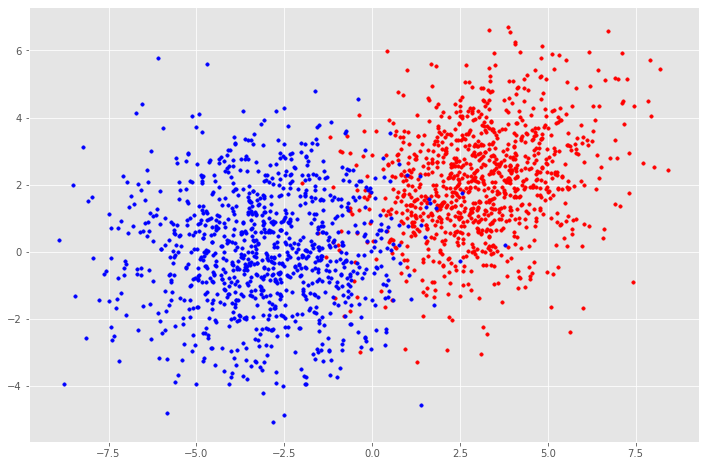

In [24]:
x1, y1 = np.random.multivariate_normal(mean=[3, 2],
                                       cov=[[3, 1], [1, 3]],
                                       size=1000).T

x2, y2 = np.random.multivariate_normal(mean=[-3, 0],
                                       cov=[[4, 0], [0, 3]],
                                       size=1000).T

fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(x1, y1, s=12, c='r')
ax.scatter(x2, y2, s=12, c='b');

**contour:**

В Matplotlib существует функционал для визуализации линий уровня некоторой поверхности.

In [25]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)

X, Y = np.meshgrid(x, y)
Z = np.sinc(X * Y) * np.cos(X ** 2 + Y ** 2)

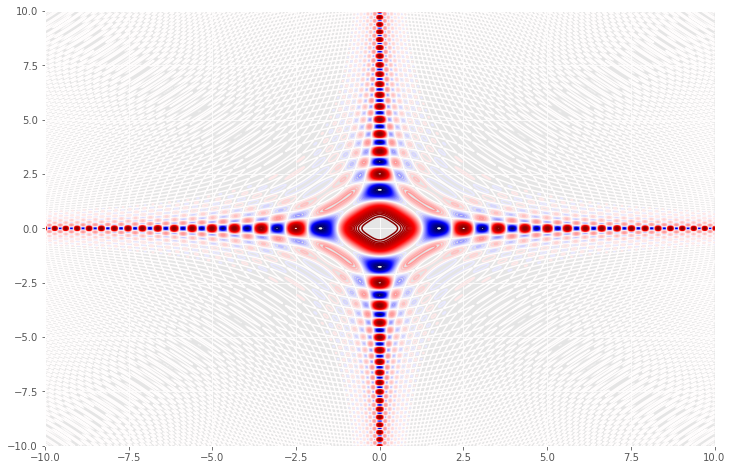

In [26]:
fig, ax = fig, ax = plt.subplots(figsize=(12, 8)) 

ax.contour(X, Y, Z, levels=60, cmap='seismic');

**contourf:**

Для визуализации линий уровня с заливкой используйте contourf.

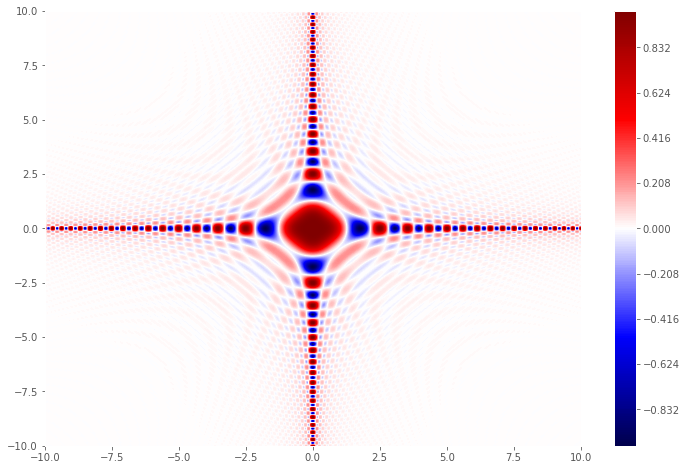

In [27]:
plt.figure(figsize=(12, 8))
plt.contourf(X, Y, Z, levels=256, cmap='seismic')
plt.colorbar()
plt.clim(-1, 1);

**quiver:**

Также существует специальный функционал для визуализации векторных полей. 

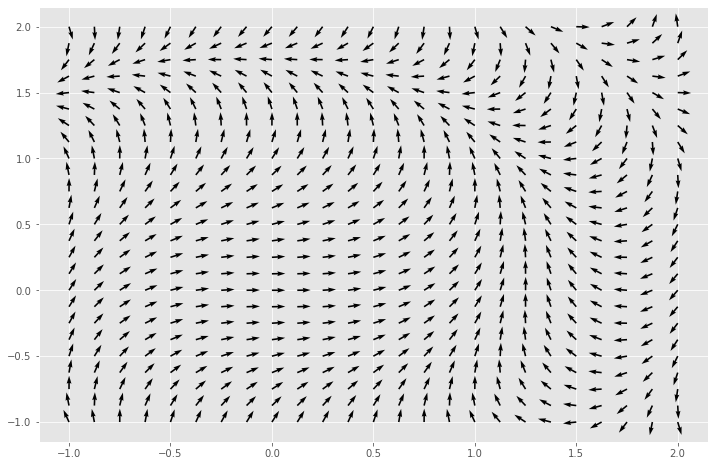

In [28]:
x = np.linspace(-1, 2, 25)
y = np.linspace(-1, 2, 25)

U = np.cos(x[:, np.newaxis] ** 2 + y ** 2)
V = np.sin(x[:, np.newaxis] ** 2 + y ** 2)

fig, ax = plt.subplots(figsize=(12, 8))
ax.quiver(x, y, U, V, scale=50);